In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from io import StringIO
import numpy as np
from datetime import datetime, timedelta

In [2]:
#Read in Data
pickup_data = pd.read_csv('6_pickup.csv')
mismatched_rates_data = pd.read_csv('rates_6_refundables.csv')
full_refundable_rates_data = pd.read_csv('full_refundables_rate_data.csv')
bookings_forecast_data = pd.read_csv('bookings_forecast.csv')

/var/folders/7m/8y6jbsj56511tmcdmrpyjlrr0000gn/T/ipykernel_95127/1251679035.py:3: DtypeWarning: Columns (6,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  mismatched_rates_data = pd.read_csv('rates_6_refundables.csv')


In [14]:

def create_heatmap(data, start_date, end_date, value_column='refundable_rate', cmap='rainbow'):
    # Convert 'report_date' and 'stay_date' to datetime and then to date
    data['report_date'] = pd.to_datetime(data['report_date']).dt.date
    data['stay_date'] = pd.to_datetime(data['stay_date']).dt.date
    
    # Convert start_date and end_date to datetime.date objects if they're not already
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()
    
    # Create a date range for both axes
    all_dates = pd.date_range(start=start_date, end=end_date).date
    
    # Create a pivot table with the full date range
    pivot_data = data.pivot_table(values=value_column, index='stay_date', columns='report_date', aggfunc='sum')
    pivot_data = pivot_data.reindex(index=all_dates, columns=all_dates, fill_value=np.nan)
    
    # Check for any infinities or very large values
    if np.isinf(pivot_data).any().any() or (np.abs(pivot_data) > 1e10).any().any():
        print("Warning: Infinite or very large values detected in the data.")
        pivot_data = pivot_data.replace([np.inf, -np.inf], np.nan)
    
    # Check if the data is not empty
    if not pivot_data.empty:
        # Set up the plot style
        plt.style.use('default')
        
        # Create the figure and axes
        fig, ax = plt.subplots(figsize=(20, 16))
        
        # Create the heatmap using seaborn
        sns.heatmap(
            pivot_data,
            cmap=cmap,
            annot=False,
            fmt='.2f',
            cbar_kws={'label': f'{value_column}'},
            ax=ax,
            mask=pivot_data.isnull()
        )
        
        # Set title and labels
        ax.set_title(f'Heatmap of {value_column}\nfor Dates from {start_date} to {end_date}',
                     fontsize=20, fontweight='bold', pad=20)
        ax.set_xlabel('Report Date', fontsize=14, labelpad=10)
        ax.set_ylabel('Stay Date', fontsize=14, labelpad=10)
        
        # Calculate tick positions and labels
        num_ticks = 10  # Adjust this for more or fewer ticks
        tick_indices = np.linspace(0, len(all_dates) - 1, num_ticks, dtype=int)
        tick_dates = [all_dates[i] for i in tick_indices]
        tick_labels = [date.strftime('%Y-%m-%d') for date in tick_dates]
        
        # Set x-axis and y-axis ticks
        ax.set_xticks(tick_indices)
        ax.set_xticklabels(tick_labels, rotation=45, ha='right', fontsize=10)
        ax.set_yticks(tick_indices)
        ax.set_yticklabels(tick_labels, fontsize=10)
        
        # Remove gridlines
        ax.grid(False)
        
        # Adjust layout and display the plot
        plt.tight_layout()
        plt.show()
        
        # Print some statistics about the data
        print(f"Data shape: {pivot_data.shape}")
        print(f"Number of NaN values: {pivot_data.isna().sum().sum()}")
        print(f"Data range: {pivot_data.min().min()} to {pivot_data.max().max()}")
    else:
        print(f"No data found for dates from {start_date} to {end_date}.")


In [15]:
def convert_to_previous_year(start_date, end_date):
    # Convert input strings to datetime objects if they're not already
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, '%Y-%m-%d')
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, '%Y-%m-%d')
    
    # Calculate the number of days in the year for both start and end dates
    start_days_in_year = 366 if start_date.year % 4 == 0 else 365
    end_days_in_year = 366 if end_date.year % 4 == 0 else 365
    
    # Convert to previous year
    prev_start = start_date.replace(year=start_date.year - 1)
    prev_end = end_date.replace(year=end_date.year - 1)
    
    # Adjust for leap years
    if start_date.month == 2 and start_date.day == 29:
        prev_start = prev_start - timedelta(days=1)
    if end_date.month == 2 and end_date.day == 29:
        prev_end = prev_end - timedelta(days=1)
    
    return prev_start.date(), prev_end.date()

In [16]:
#Read in Data
pickup_data = pd.read_csv('6_pickup.csv')
mismatched_rates_data = pd.read_csv('rates_6_refundables.csv')
full_refundable_rates_data = pd.read_csv('full_refundables_rate_data.csv')



/var/folders/7m/8y6jbsj56511tmcdmrpyjlrr0000gn/T/ipykernel_95127/1131553718.py:3: DtypeWarning: Columns (6,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  mismatched_rates_data = pd.read_csv('rates_6_refundables.csv')


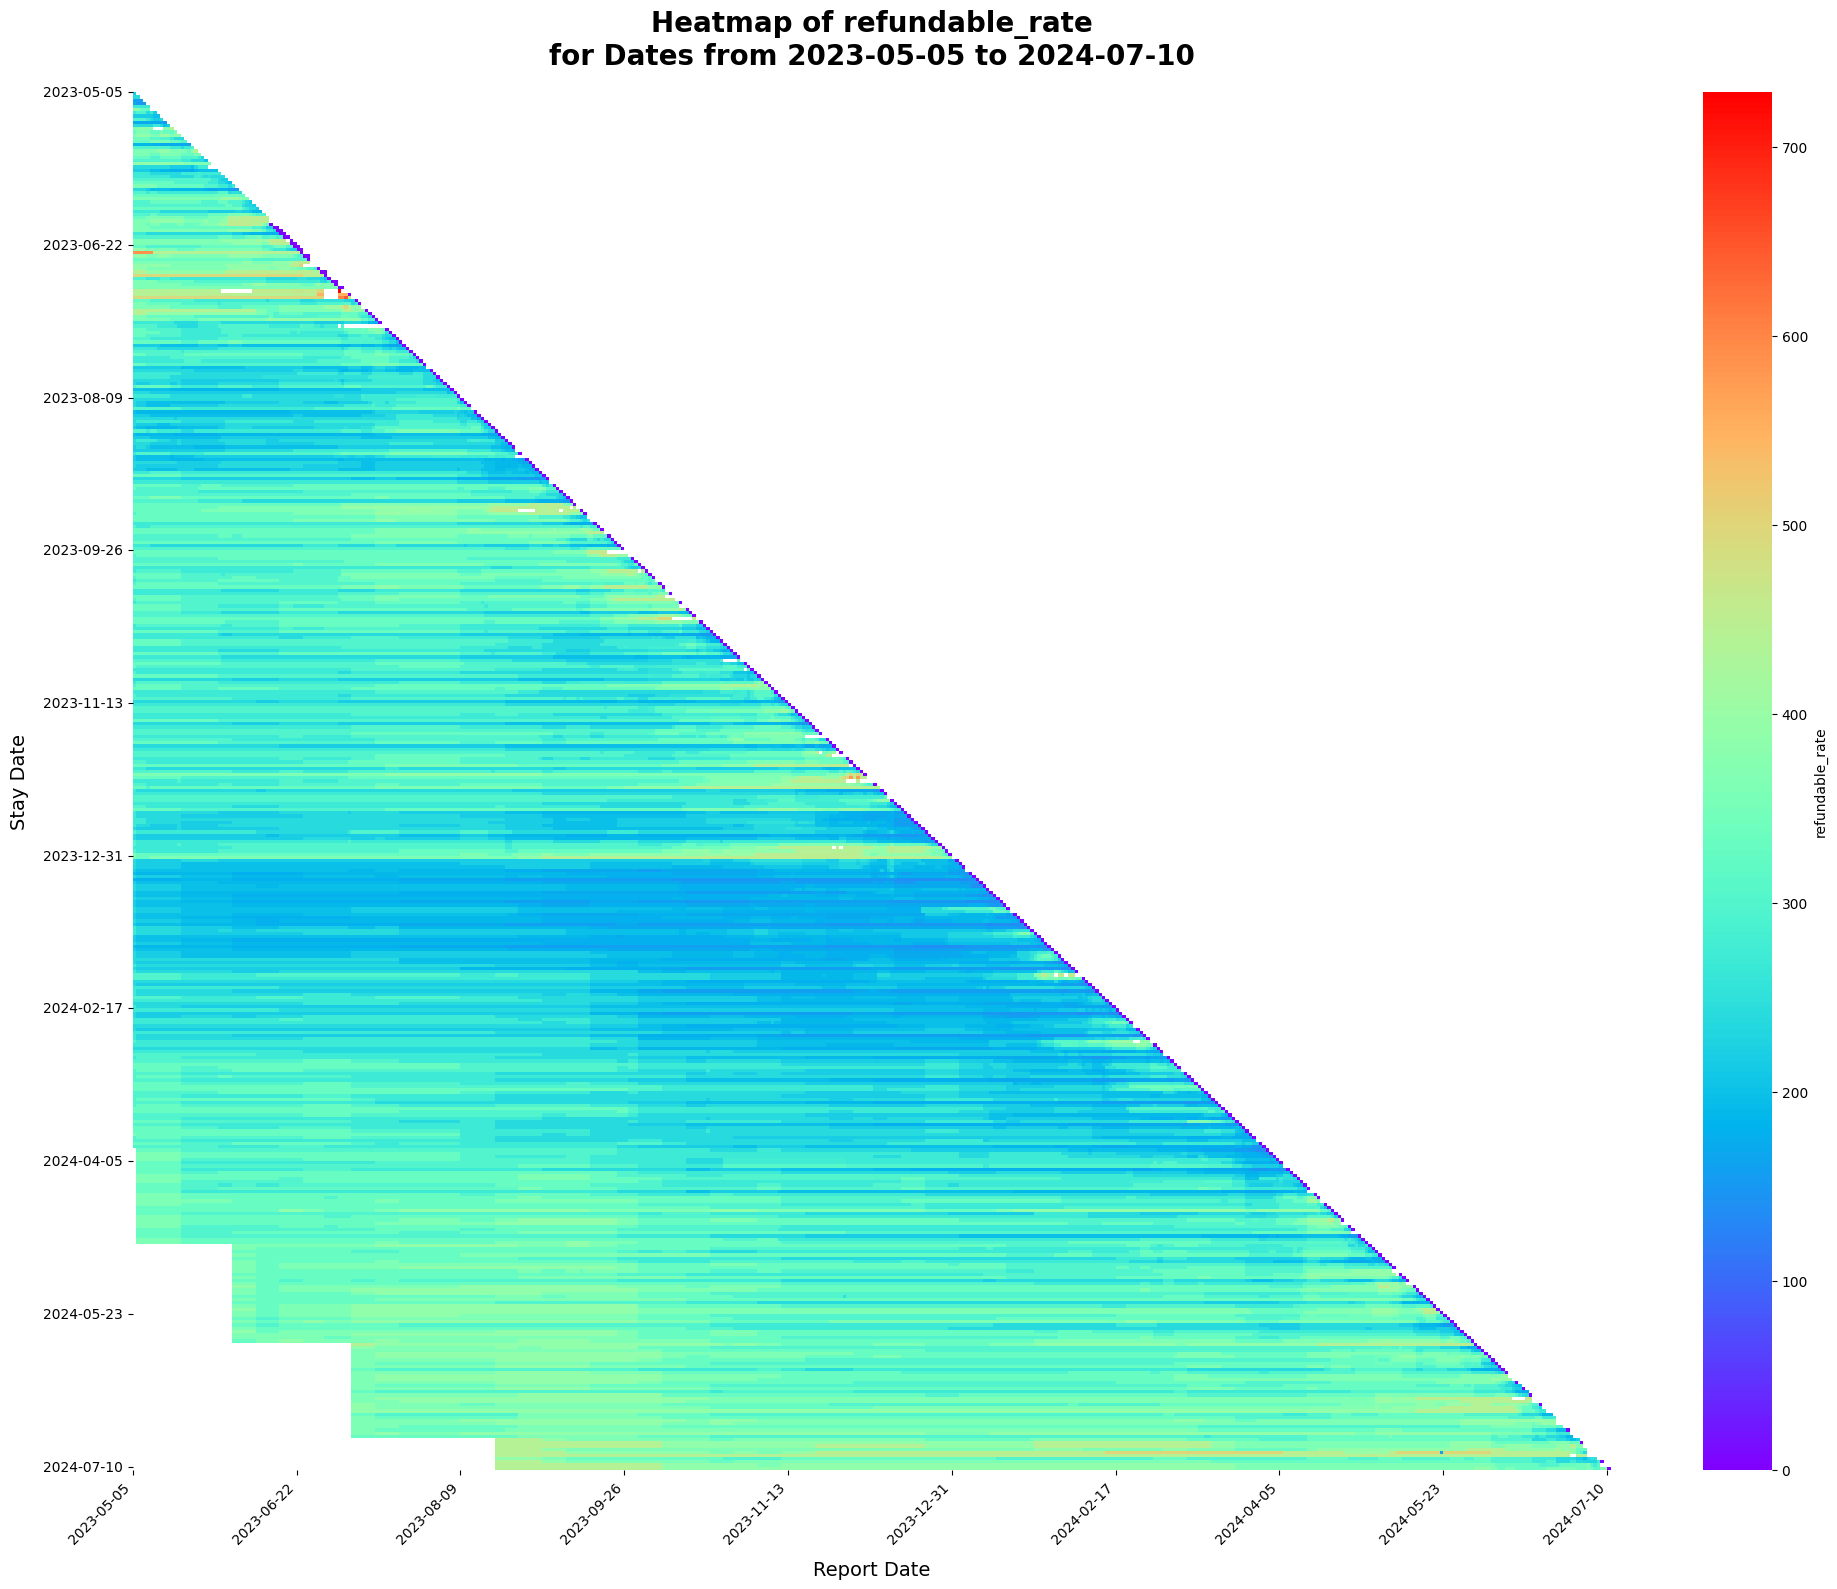

Data shape: (433, 433)
Number of NaN values: 97624
Data range: 0.0 to 729.0


In [17]:
#Ful Refundable Rates
start_date = '2023-05-05'
end_date = '2024-07-10'
create_heatmap(full_refundable_rates_data, start_date, end_date, 'refundable_rate', cmap='rainbow')

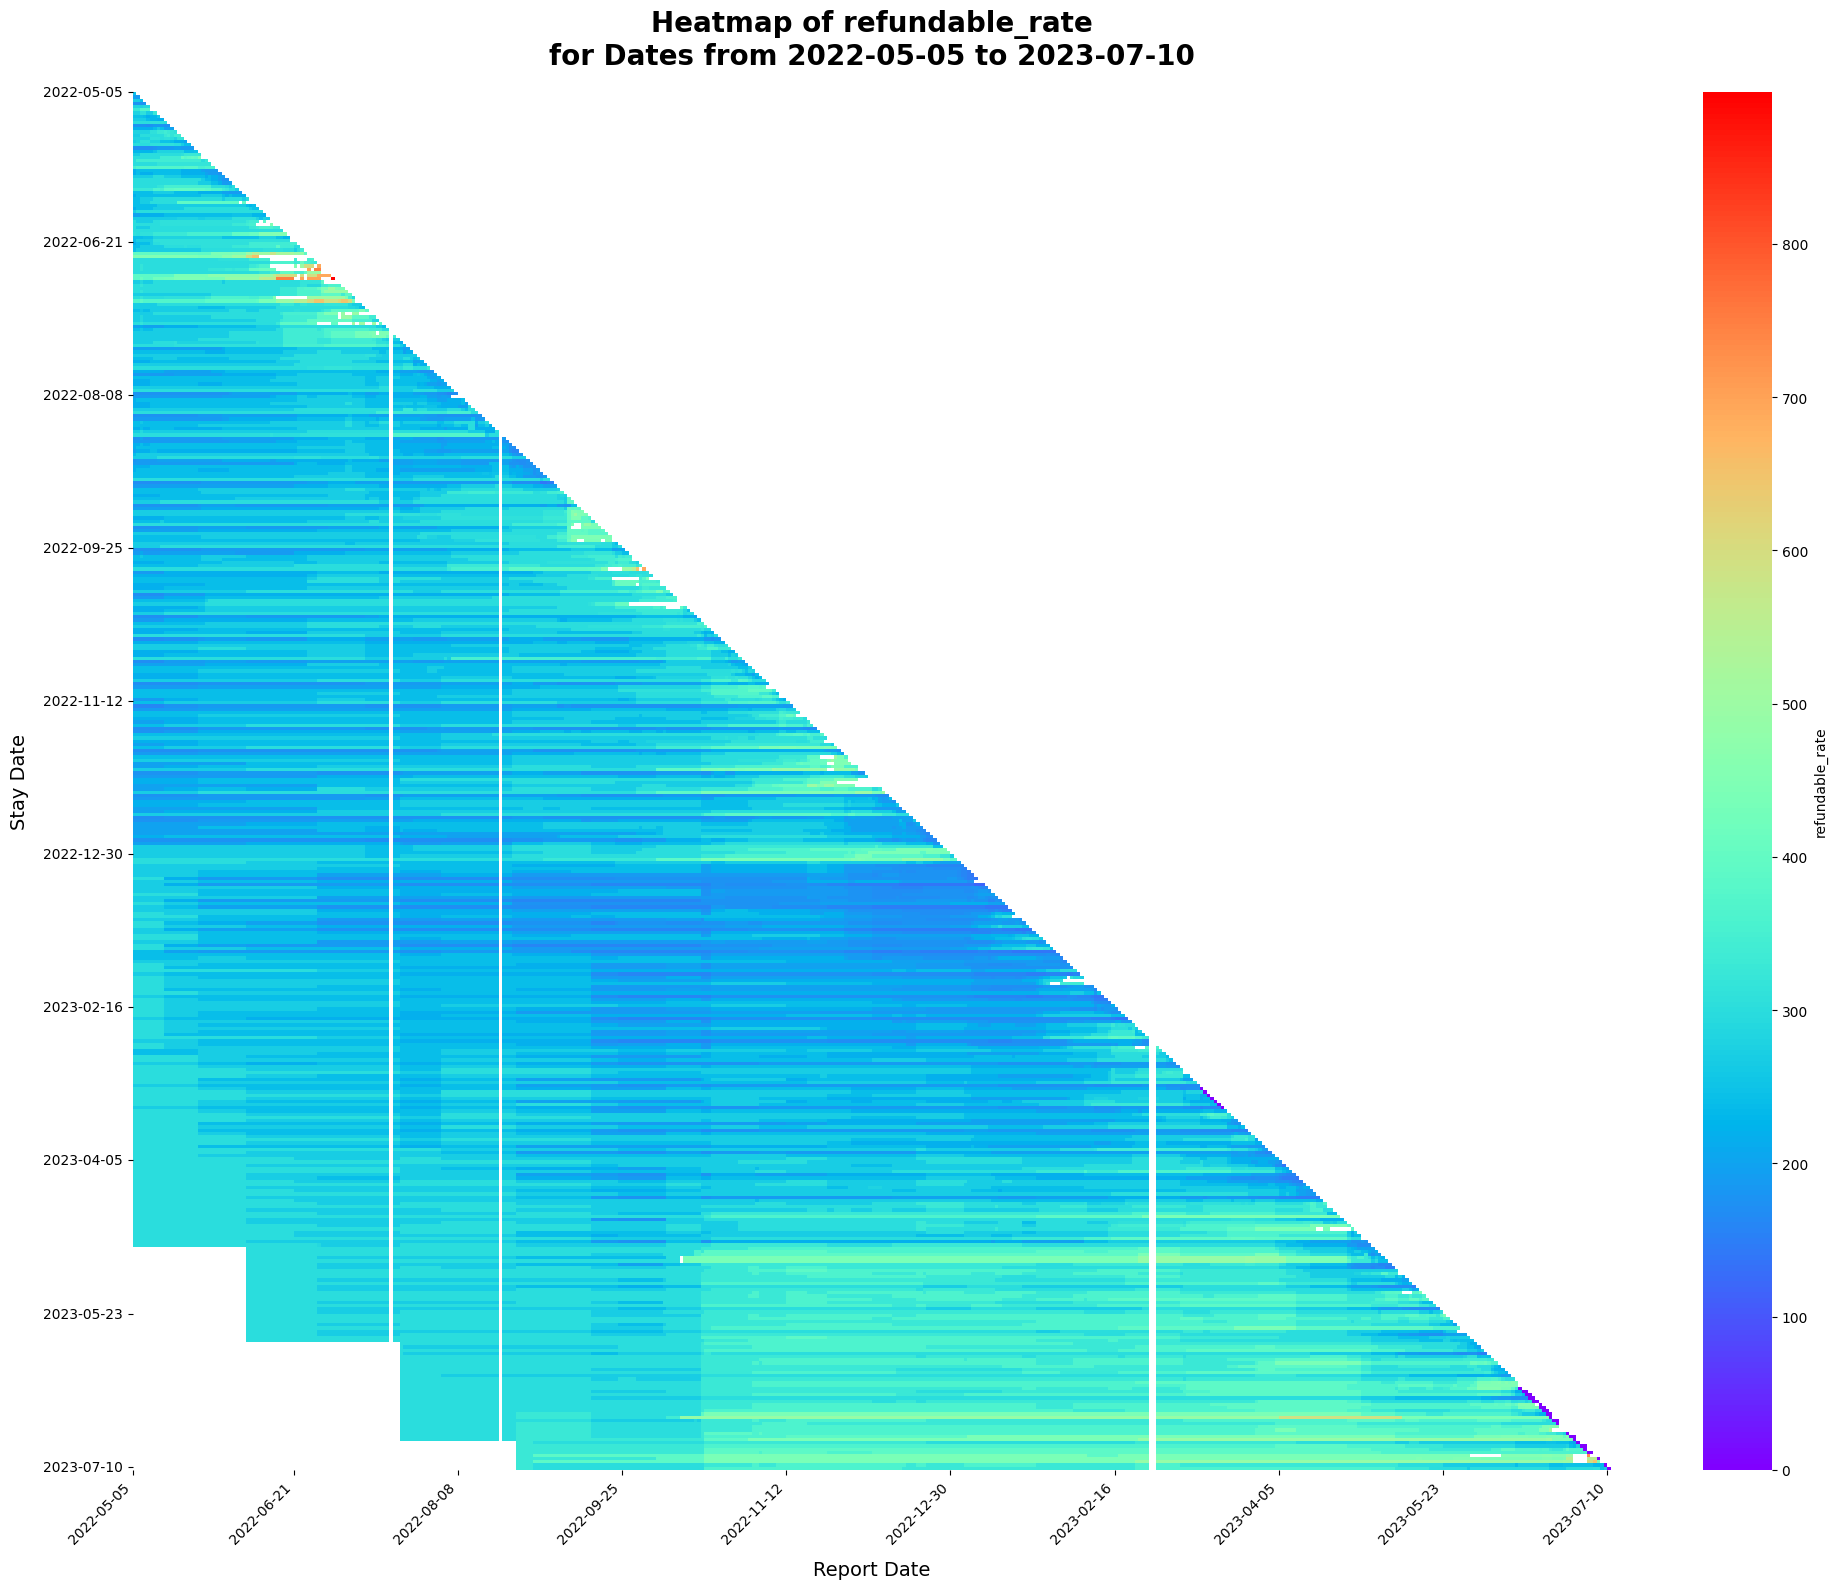

Data shape: (432, 432)
Number of NaN values: 98688
Data range: 0.0 to 899.0


In [18]:
spit_start_date, spit_end_date = convert_to_previous_year(start_date, end_date)
create_heatmap(full_refundable_rates_data, spit_start_date, spit_end_date, 'refundable_rate', cmap='rainbow')

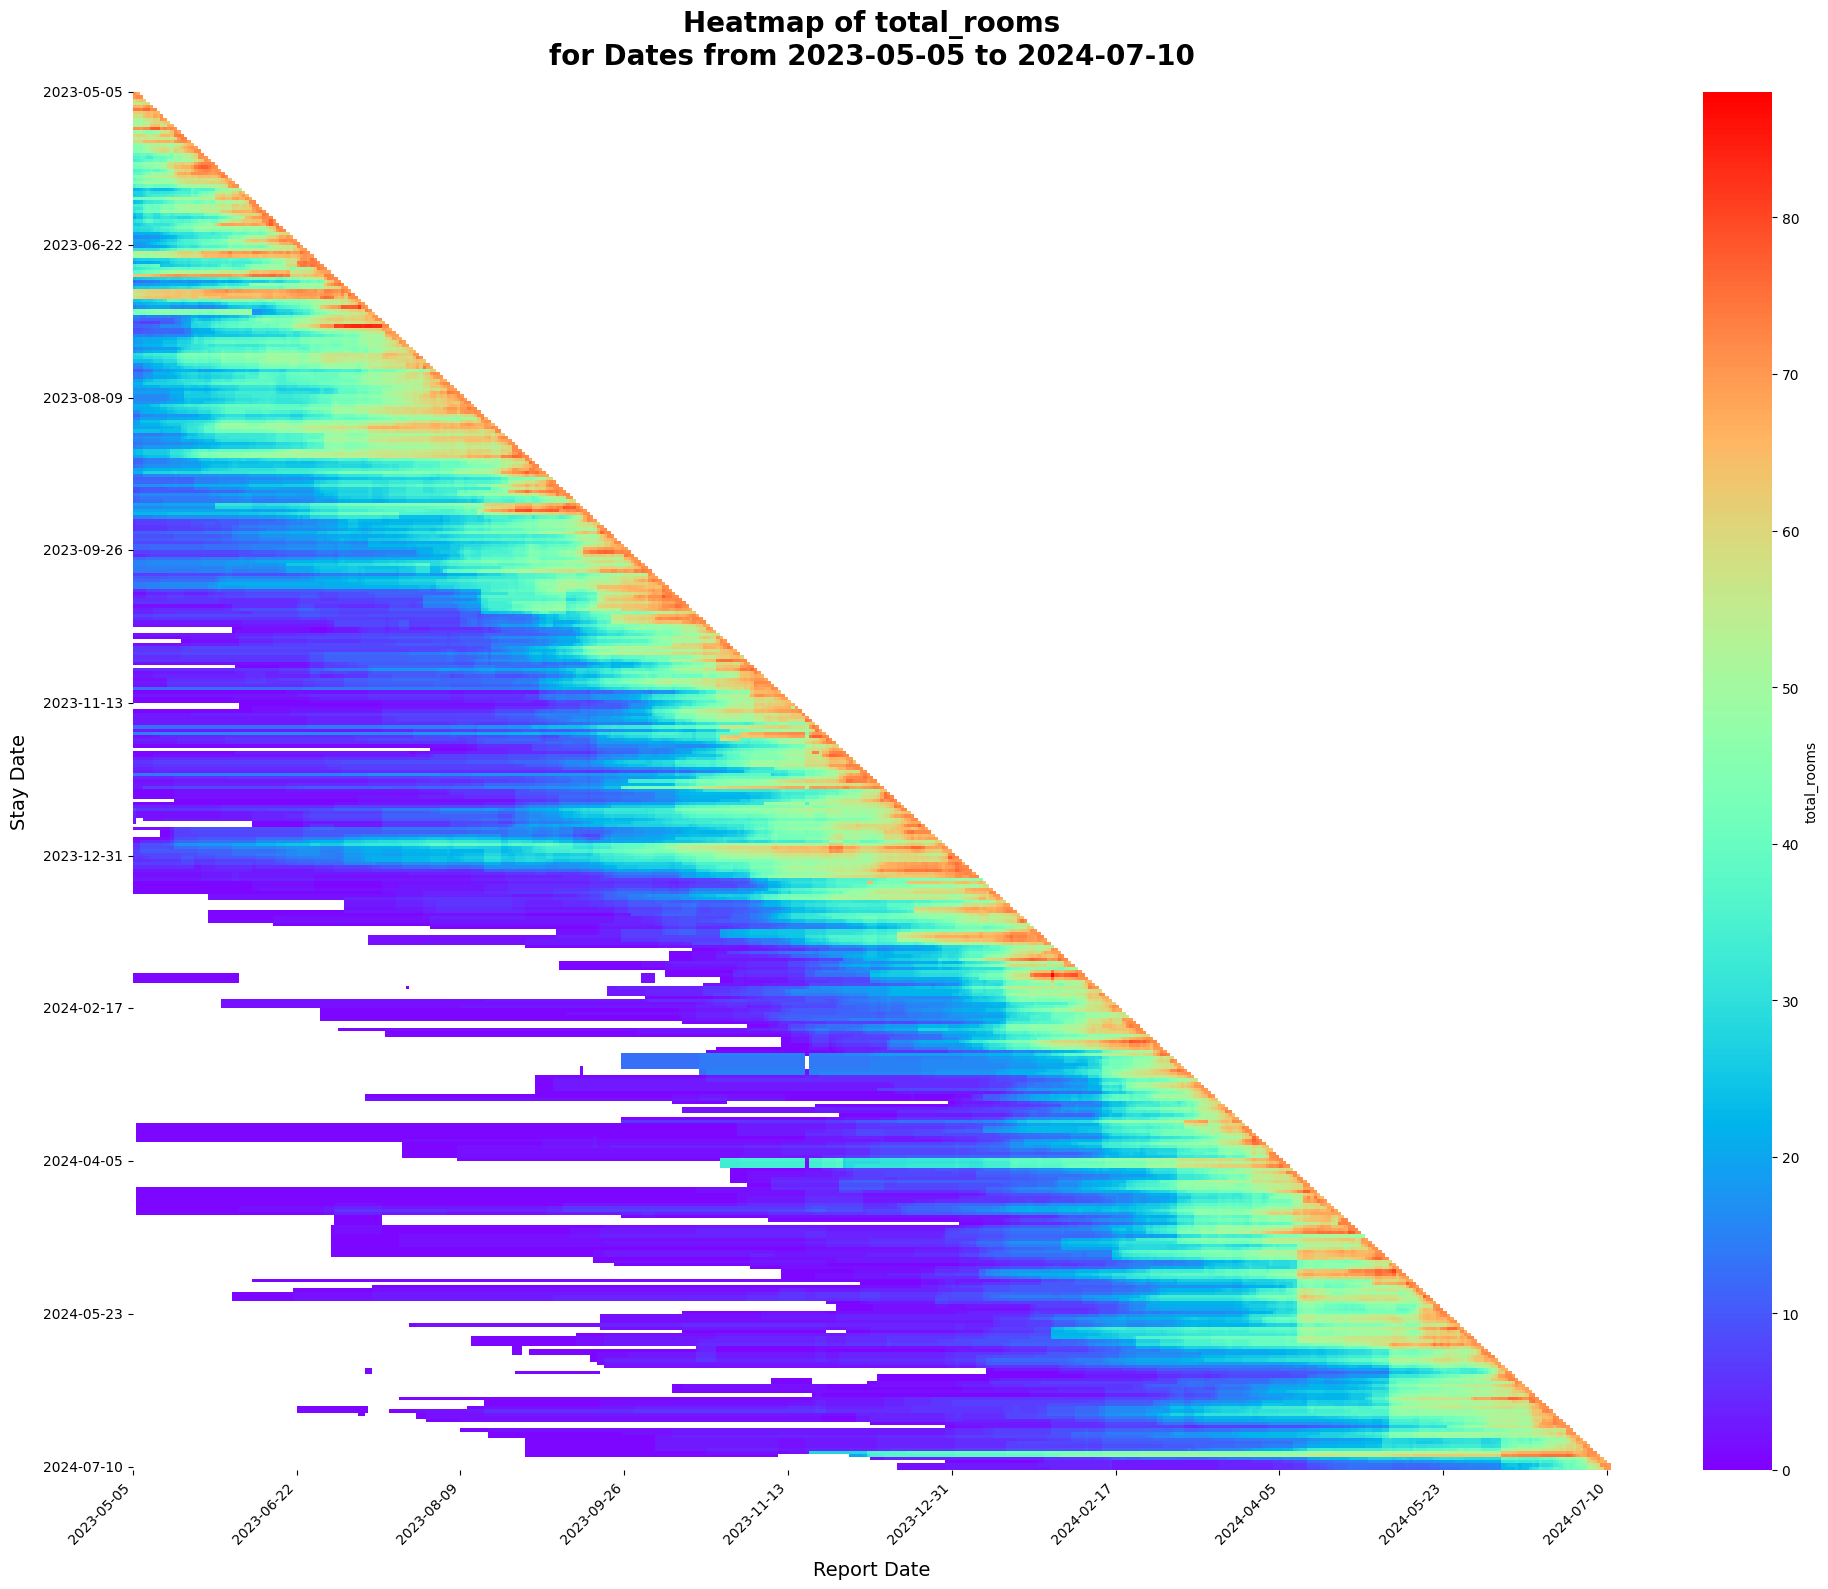

Data shape: (433, 433)
Number of NaN values: 114005
Data range: 0.0 to 88.0


In [20]:
#Pickup Data
create_heatmap(pickup_data, start_date, end_date, 'total_rooms', cmap='rainbow')

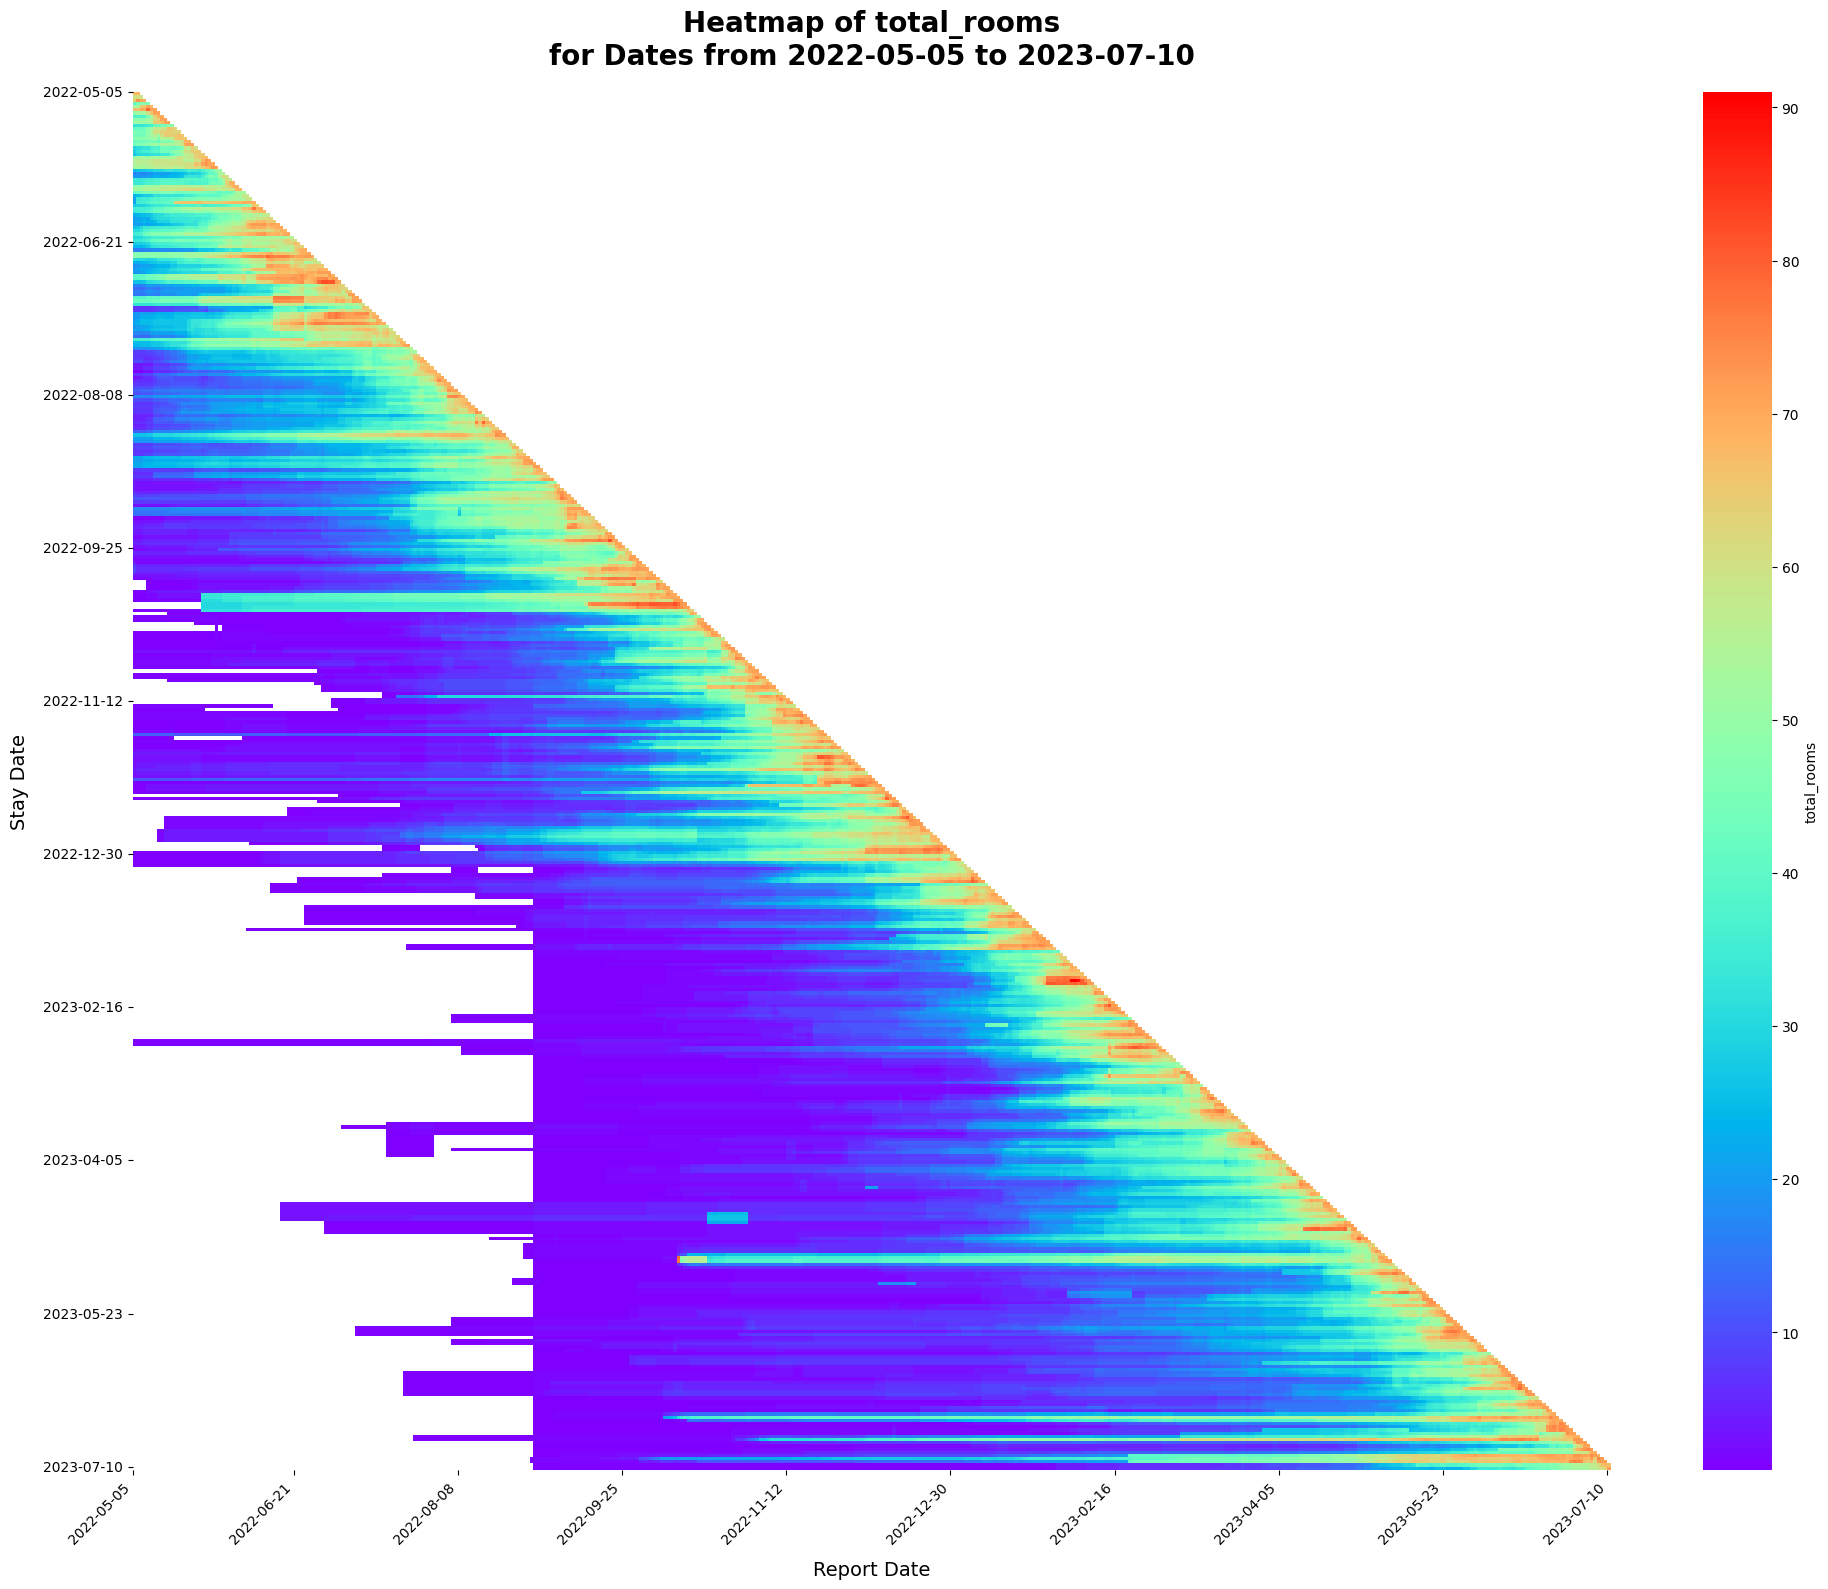

Data shape: (432, 432)
Number of NaN values: 112993
Data range: 1.0 to 91.0


In [22]:
spit_start_date, spit_end_date = convert_to_previous_year(start_date, end_date)
create_heatmap(pickup_data, spit_start_date, spit_end_date, 'total_rooms', cmap='rainbow')

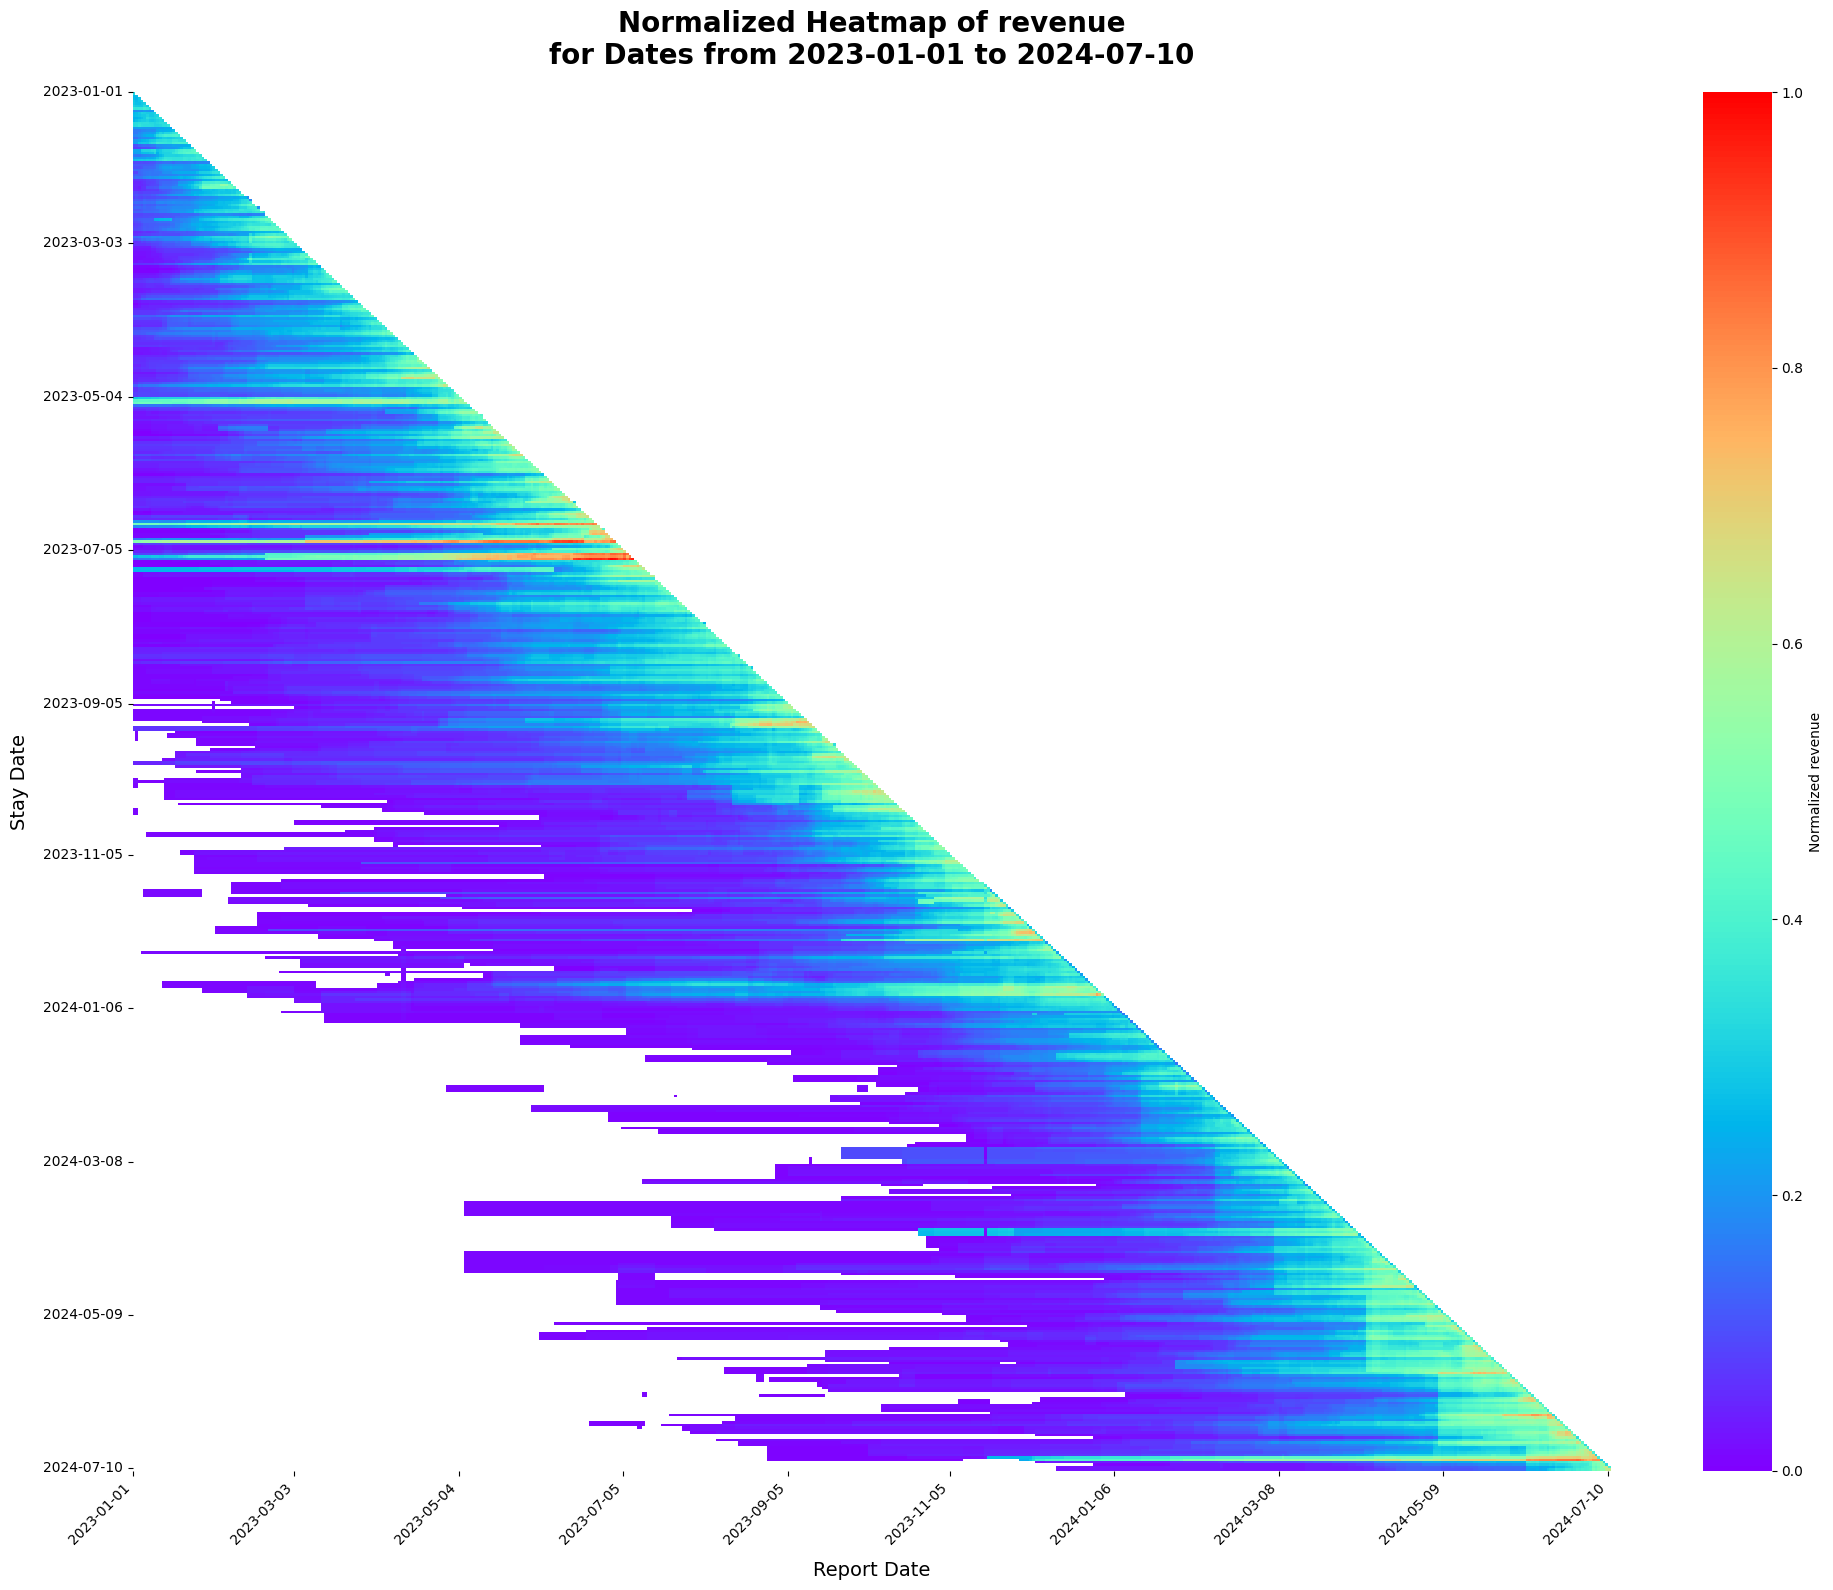

Data shape: (557, 557)
Number of NaN values: 204294
Data range: 0.0 to 1.0


In [19]:
create_normalized_heatmap(bookings_forecast_data, '2023-01-01', '2024-07-10', 'revenue', cmap='rainbow')